<a href="https://colab.research.google.com/github/esterfb3397/fake-news-project-tfm/blob/main/preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
#Para acceder al repositorio actualizado desde otro Notebook

#!git clone https://github.com/esterfb3397/fake-news-project-tfm.git


#Librerias

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string 
import re 
 
from tqdm.autonotebook import tqdm
tqdm.pandas()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report


In [67]:
df = pd.read_excel('/content/fake-news-project-tfm/data/clean_data.xlsx')

In [68]:
df.head(2)

,title_text,label,subject,length,nwords,avg_char_word,n_distint_word
0,"As U.S. budget fight looms, Republicans flip t...",0,politicsNews,4724,763,6.191350,427
1,U.S. military to accept transgender recruits o...,0,politicsNews,4142,634,6.533123,340


Vemos que se ha cargado bastante bien, de momento vamos a eliminar las columnas subject,nwords,avg_char_word y n_distint_word

In [69]:
df = df.drop(['subject', 'nwords','avg_char_word','n_distint_word'], axis=1)

In [70]:
df.head(2)

,title_text,label,length
0,"As U.S. budget fight looms, Republicans flip t...",0,4724
1,U.S. military to accept transgender recruits o...,0,4142


# Transformación

## Normalización
Vamos a proceder a normalizar los datos. Para ello vamos a generar pequeñas funciones que nos permitan:

- Transformar a minúsculas.


- Lematizar tokens.
- Tokenizar.
- Eliminar stopwords.
- Eliminar sígnos de puntuación.

#### Eliminar signos de puntuación

In [84]:
#función para eliminar la puntuacion de cada linea de texto
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#aplicamos la funcion
df['puntuacion']= df['title_text'].apply(lambda x:remove_punctuation(x))
df.head()

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0,2850,Senior U.S. Republican senator: 'Let Mr. Muell...,senior u.s. republican senator: 'let mr. muell...,senior u.s. republican senator: 'let mr. muell...,Senior US Republican senator Let Mr Mueller do...
3,FBI Russia probe helped by Australian diplomat...,0,2521,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped by australian diplomat...,fbi russia probe helped by australian diplomat...,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,0,5274,Trump wants Postal Service to charge 'much mor...,trump wants postal service to charge 'much mor...,trump wants postal service to charge 'much mor...,Trump wants Postal Service to charge much more...


#### Minúsculas

In [74]:
def texto_to_lower(text):
  return text.lower()

In [85]:
df['minusculas'] = df['puntuacion'].apply(lambda x:texto_to_lower(x))

In [86]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...,"as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...


#### Eliminar URL

In [81]:
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

In [82]:
df['url'] = df['minusculas'].apply(lambda x:remove_URL(x))

In [83]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...","as u.s. budget fight looms, republicans flip t...","as u.s. budget fight looms, republicans flip t..."
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...,u.s. military to accept transgender recruits o...


#### Tokenizador

In [77]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
from nltk import word_tokenize

def tokenization(text):
  tokens = word_tokenize(text)
  return tokens

In [87]:
df['tokenized'] = df['url'].apply(lambda x:word_tokenize(x))

In [88]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion,tokenized
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...,"as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...,"[as, u.s., budget, fight, looms, ,, republican..."
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...,"[u.s., military, to, accept, transgender, recr..."


#### Quitar stop words


In [89]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
from nltk.corpus import stopwords
def quitar_stopwords(tokens):
    stop_words = set(stopwords.words('english')) 
    filtered_sentence = [w for w in tokens if not w in stop_words]
    return filtered_sentence

In [91]:
df['stopwords'] = df['tokenized'].apply(lambda x:quitar_stopwords(x))

In [92]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion,tokenized,stopwords
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...,"as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...,"[as, u.s., budget, fight, looms, ,, republican...","[u.s., budget, fight, looms, ,, republicans, f..."
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...,"[u.s., military, to, accept, transgender, recr...","[u.s., military, accept, transgender, recruits..."


#### Lematizacion

In [93]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return mytokens

In [94]:
df['lematizado']= df['stopwords'].apply(lambda x:lematizar(x))

In [95]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion,tokenized,stopwords,lematizado
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...,"as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...,"[as, u.s., budget, fight, looms, ,, republican...","[u.s., budget, fight, looms, ,, republicans, f...","[u.s, ., budget, fight, loom, ,, republicans, ..."
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...,"[u.s., military, to, accept, transgender, recr...","[u.s., military, accept, transgender, recruits...","[u.s, ., military, accept, transgender, recrui..."


se ha hecho el preprocesado, y antes de introducirlo a TFIDF vamos a generar una frase de gada una de las listas de tokens, para utilizar el propio tokenizador de TFIDF.

In [96]:
df["clean_text"] = df["lematizado"].progress_apply(lambda x: " ".join(x))

  0%|          | 0/44685 [00:00<?, ?it/s]

In [97]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion,tokenized,stopwords,lematizado,clean_text
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...,"as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...,"[as, u.s., budget, fight, looms, ,, republican...","[u.s., budget, fight, looms, ,, republicans, f...","[u.s, ., budget, fight, loom, ,, republicans, ...","u.s . budget fight loom , republicans flip fis..."
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...,"[u.s., military, to, accept, transgender, recr...","[u.s., military, accept, transgender, recruits...","[u.s, ., military, accept, transgender, recrui...",u.s . military accept transgender recruit mond...


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


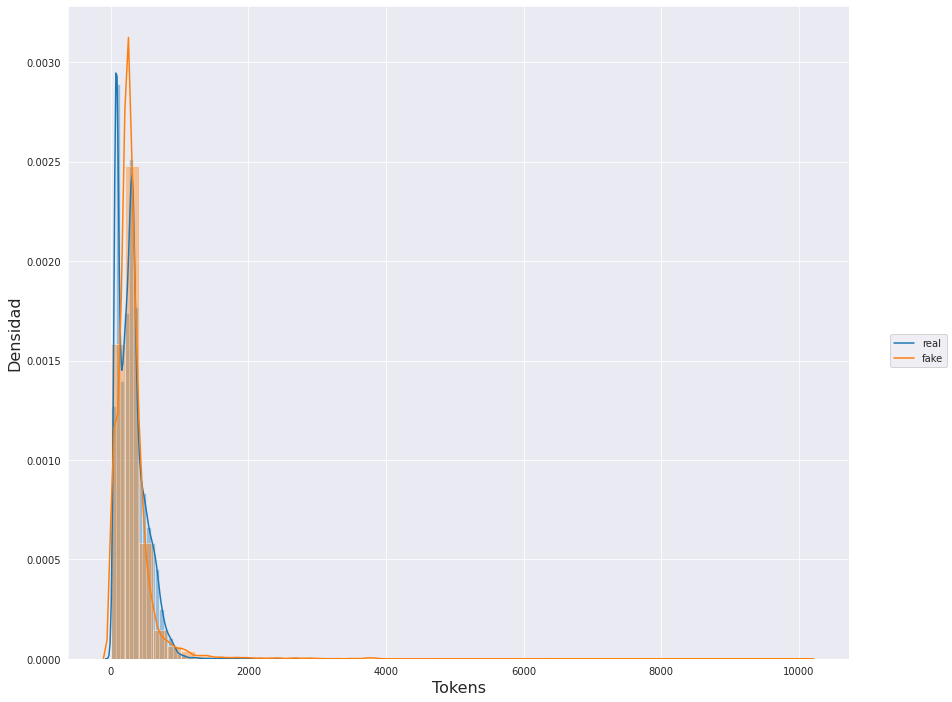

In [98]:
df["token_len"] = df['lematizado'].apply(lambda x: len(x))

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
plt1 = sns.distplot(df[df.label==0].token_len, hist=True, label="real")
plt2 = sns.distplot(df[df.label==1].token_len, hist=True, label="fake")
fig.legend(labels=['real','fake'],loc=5)

# Definimos el título de los ejes:
plt.xlabel('Tokens', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

plt.show()

In [99]:
df.head(2)

,title_text,label,length,eliminar_espacios,minusculas,url,puntuacion,tokenized,stopwords,lematizado,clean_text,token_len
0,"As U.S. budget fight looms, Republicans flip t...",0,4724,"As U.S. budget fight looms, Republicans flip t...",as us budget fight looms republicans flip thei...,"as u.s. budget fight looms, republicans flip t...",As US budget fight looms Republicans flip thei...,"[as, u.s., budget, fight, looms, ,, republican...","[u.s., budget, fight, looms, ,, republicans, f...","[u.s, ., budget, fight, loom, ,, republicans, ...","u.s . budget fight loom , republicans flip fis...",605
1,U.S. military to accept transgender recruits o...,0,4142,U.S. military to accept transgender recruits o...,us military to accept transgender recruits on ...,u.s. military to accept transgender recruits o...,US military to accept transgender recruits on ...,"[u.s., military, to, accept, transgender, recr...","[u.s., military, accept, transgender, recruits...","[u.s, ., military, accept, transgender, recrui...",u.s . military accept transgender recruit mond...,493


Al haber hecho todo el proceso, siguen habiendo varios outliers, por lo que se procederá a quitarlos

In [103]:
df['token_len'].describe()

count    44685.000000
mean       301.426027
std        249.620480
min          5.000000
25%        158.000000
50%        265.000000
75%        375.000000
max      10102.000000
Name: token_len, dtype: float64

In [106]:
from wordcloud import WordCloud

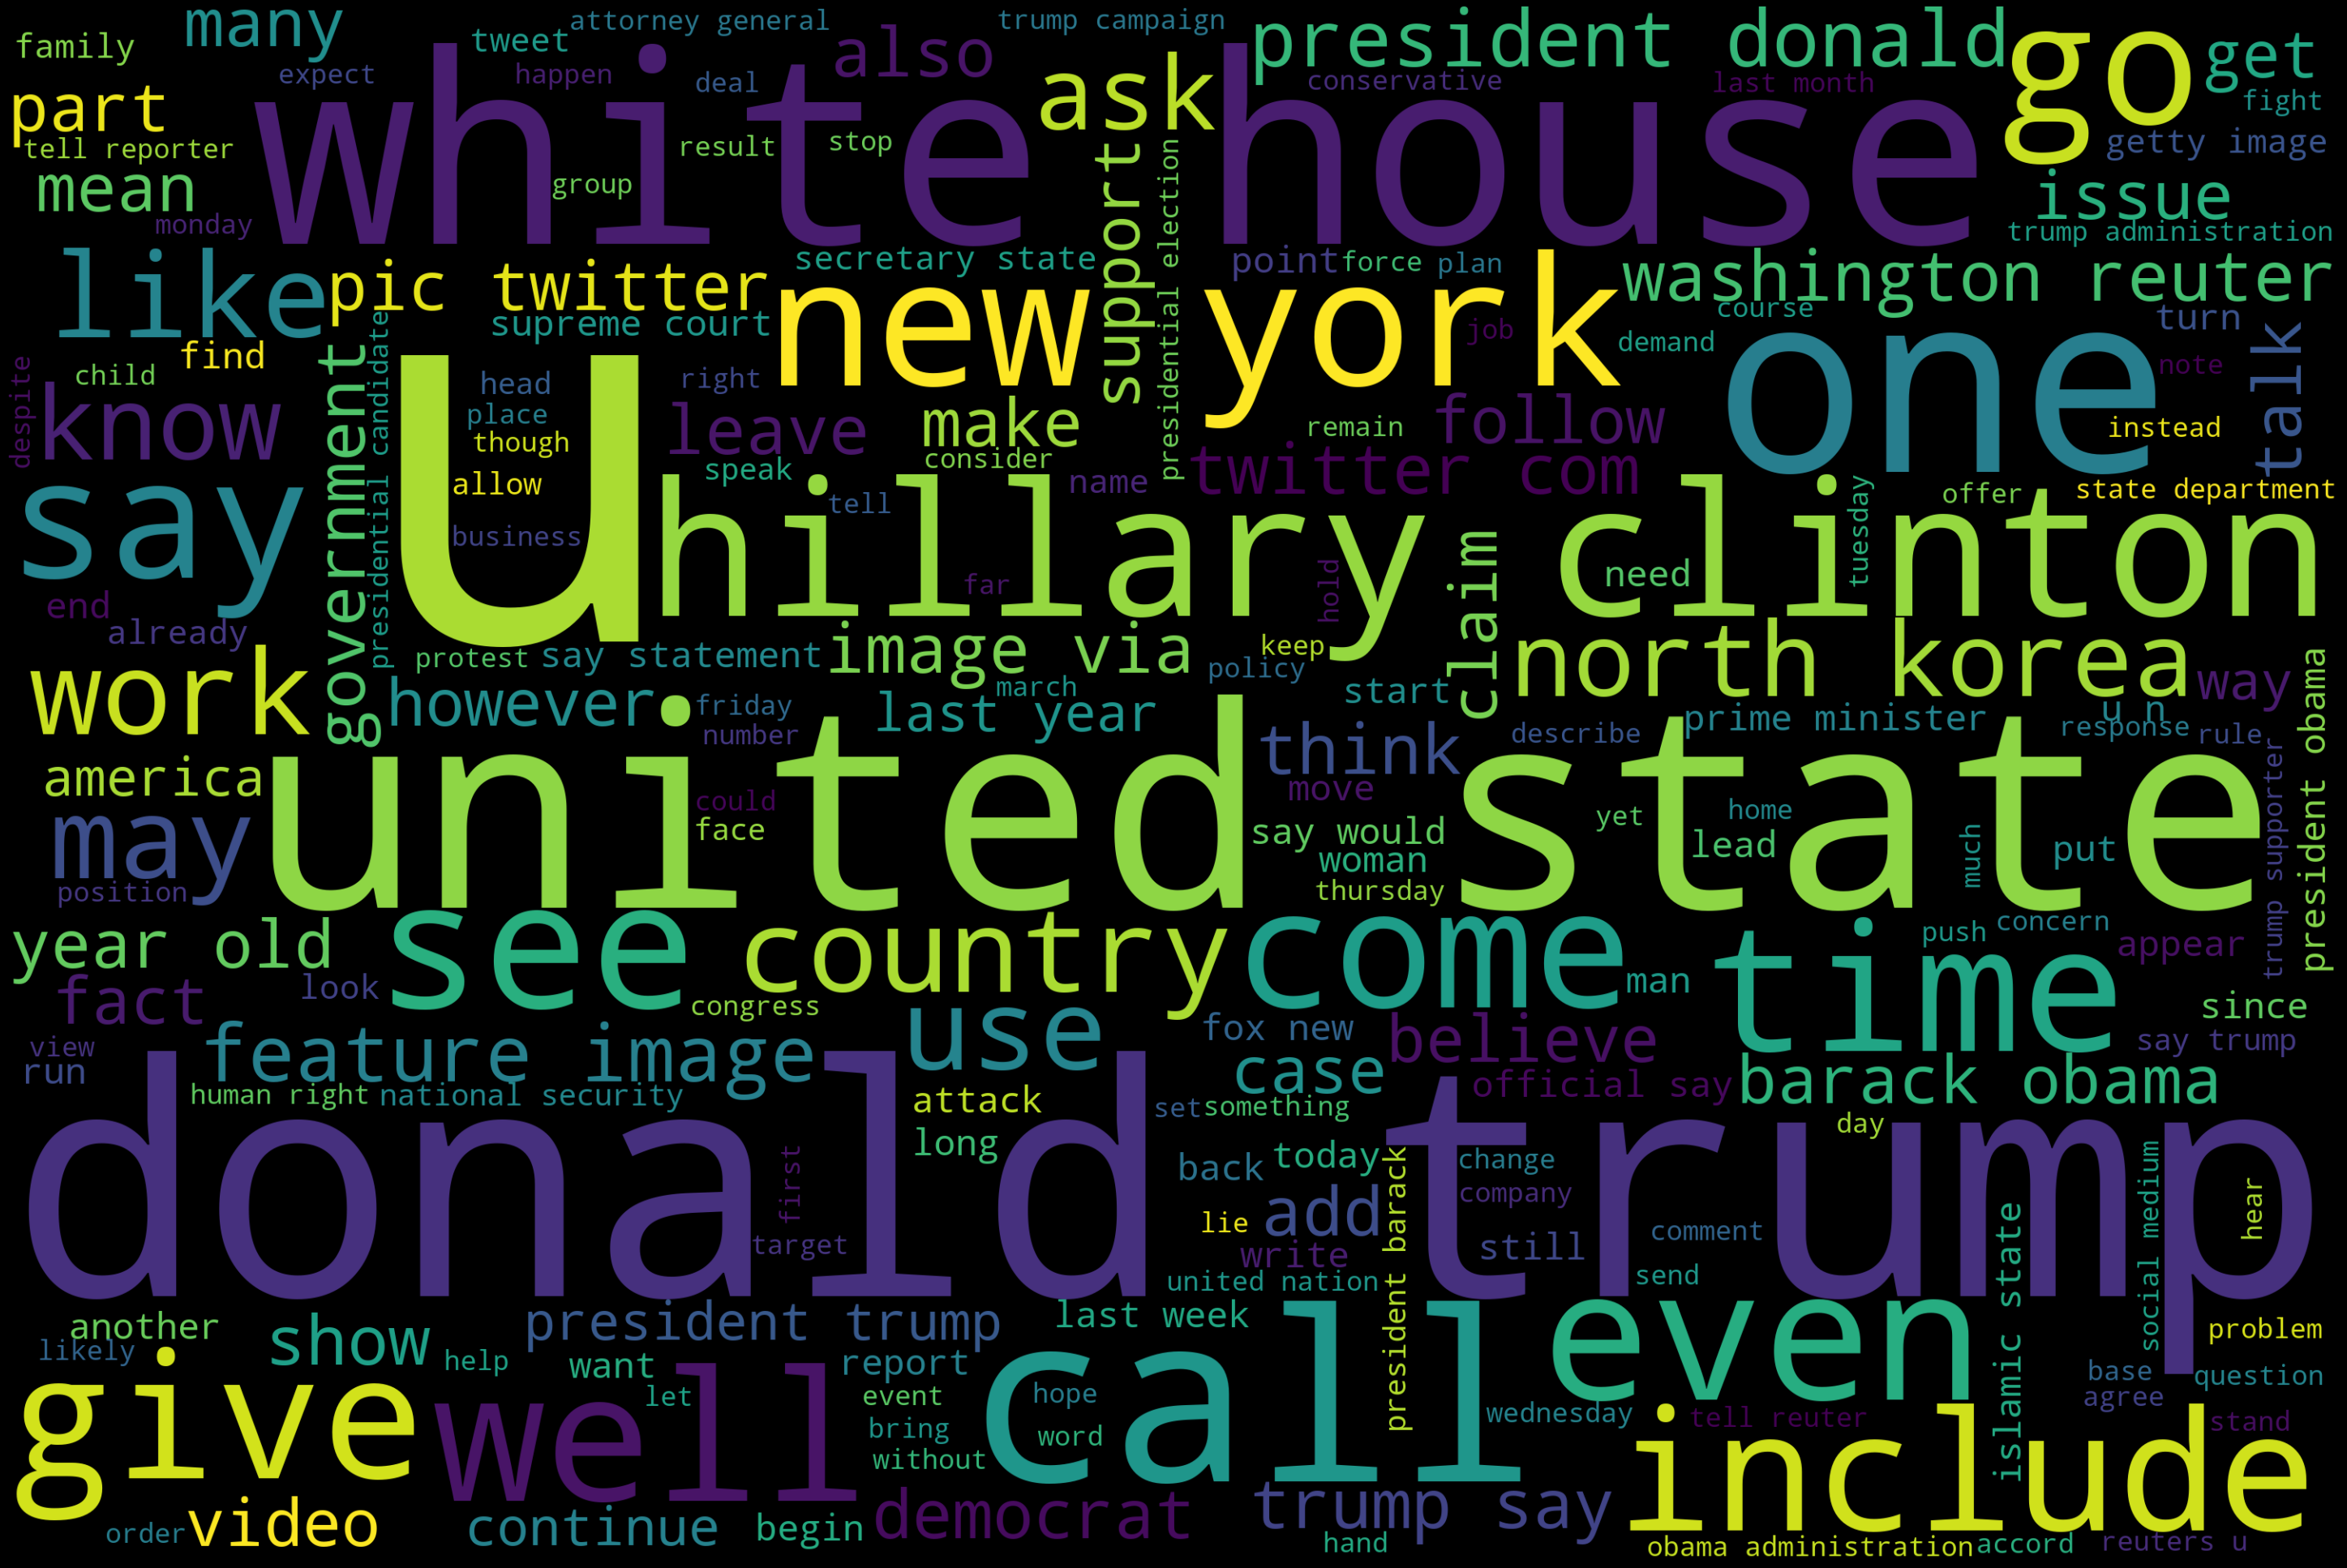

In [107]:
#Word Cloud
text = ''
for news in df.clean_text:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text


In [108]:
fig = px.bar(df['clean_text'], x='ngram', y='count', title='Counts of top bigrams', template='plotly_white', labels={'ngram': 'Bigram', 'count': 'Count'})
fig.show()

NameError: ignored

In [110]:
plt.figure(figsize=(8,5))
sns.countplot("clean_text", data=df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)


ValueError: ignored

<Figure size 576x360 with 1 Axes>